<a href="https://colab.research.google.com/github/BenjaminBradshaw/Postcodes/blob/main/Postcode_to_district_join.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 8.1 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [2]:
import geopandas as gp

In [4]:
postcode= gp.read_file("https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/POA_2021_AUST_GDA2020_SHP.zip")

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.



<AxesSubplot:>

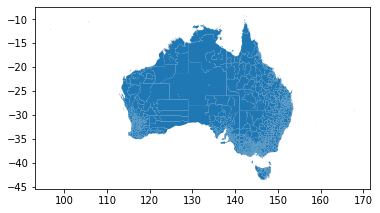

In [5]:
postcode.plot()

In [8]:
postcode

,POA_CODE21,POA_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry
0,0800,0800,AUS,Australia,3.1731,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.081893,0.000264,"POLYGON ((130.83681 -12.45376, 130.83684 -12.4..."
1,0810,0810,AUS,Australia,24.4283,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.241859,0.002031,"POLYGON ((130.89986 -12.36567, 130.89875 -12.3..."
2,0812,0812,AUS,Australia,35.8899,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.278788,0.002983,"POLYGON ((130.91915 -12.40786, 130.91831 -12.4..."
3,0820,0820,AUS,Australia,39.0642,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.409134,0.003248,"POLYGON ((130.85260 -12.43994, 130.85089 -12.4..."
4,0822,0822,AUS,Australia,150775.8030,http://linked.data.gov.au/dataset/asgsed3/POA/...,90.601831,12.564238,"MULTIPOLYGON (((136.56648 -12.08392, 136.56704..."
...,...,...,...,...,...,...,...,...,...
2639,7469,7469,AUS,Australia,5893.5125,http://linked.data.gov.au/dataset/asgsed3/POA/...,11.341555,0.636169,"MULTIPOLYGON (((144.79215 -41.46478, 144.79212..."
2640,7470,7470,AUS,Australia,108.2441,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.781048,0.011725,"POLYGON ((145.57769 -41.78640, 145.57686 -41.7..."
2641,9494,No usual address (Aust.),AUS,Australia,0.0000,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.000000,0.000000,None
2642,9797,Migratory - Offshore - Shipping (Aust.),AUS,Australia,0.0000,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.000000,0.000000,None


In [9]:
postcode.POA_NAME21.unique()

array(['0800', '0810', '0812', ..., 'No usual address (Aust.)',
       'Migratory - Offshore - Shipping (Aust.)', 'Outside Australia'],
      dtype=object)

<AxesSubplot:>

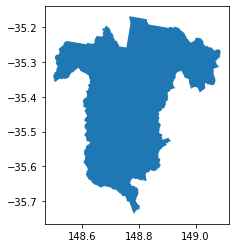

In [11]:
postcode[postcode.POA_CODE21=="2611"].plot()

In [ ]:
postcode.sjoin

In [41]:
Rd =gp.read_file("RotaryDistricts.geojson").to_crs("7844")

<AxesSubplot:>

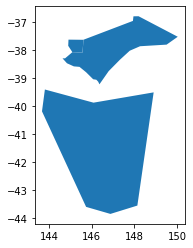

In [42]:
Rd.plot()

In [43]:
Rd

,RotaryDistrict,geometry
0,9830,"POLYGON ((143.80904 -39.40923, 143.67318 -40.1..."
1,9820,"POLYGON ((146.36299 -39.22405, 146.79489 -38.7..."
2,9810,"POLYGON ((144.90124 -37.84951, 145.09505 -38.0..."


In [44]:

join= Rd.sjoin(postcode,how='left',predicate='contains' )


In [45]:
join

,RotaryDistrict,geometry,index_right,POA_CODE21,POA_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area
0,9830,"POLYGON ((143.80904 -39.40923, 143.67318 -40.1...",2638,7468,7468,AUS,Australia,309.9494,http://linked.data.gov.au/dataset/asgsed3/POA/...,2.114872,0.033768
0,9830,"POLYGON ((143.80904 -39.40923, 143.67318 -40.1...",2636,7466,7466,AUS,Australia,68.8166,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.737044,0.007487
0,9830,"POLYGON ((143.80904 -39.40923, 143.67318 -40.1...",2637,7467,7467,AUS,Australia,144.0971,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.765625,0.015677
0,9830,"POLYGON ((143.80904 -39.40923, 143.67318 -40.1...",2640,7470,7470,AUS,Australia,108.2441,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.781048,0.011725
0,9830,"POLYGON ((143.80904 -39.40923, 143.67318 -40.1...",2639,7469,7469,AUS,Australia,5893.5125,http://linked.data.gov.au/dataset/asgsed3/POA/...,11.341555,0.636169
...,...,...,...,...,...,...,...,...,...,...,...
2,9810,"POLYGON ((144.90124 -37.84951, 145.09505 -38.0...",818,3170,3170,AUS,Australia,10.7189,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.206917,0.001098
2,9810,"POLYGON ((144.90124 -37.84951, 145.09505 -38.0...",808,3159,3159,AUS,Australia,14.0266,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.217115,0.001437
2,9810,"POLYGON ((144.90124 -37.84951, 145.09505 -38.0...",806,3156,3156,AUS,Australia,53.5101,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.487538,0.005483
2,9810,"POLYGON ((144.90124 -37.84951, 145.09505 -38.0...",1223,3782,3782,AUS,Australia,88.6992,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.646115,0.009089


In [63]:
def WhichRD(postcode):
  try:
    return join[join.POA_CODE21==postcode].RotaryDistrict.values.tolist()
  except:
    return "UNKNOW"


In [64]:
WhichRD("7119")

[9830]

In [60]:
join[join.POA_CODE21=="7256"].RotaryDistrict.values.tolist()

[9830]